In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px 

%matplotlib inline

In [2]:
data = pd.read_csv('diemthi.csv')
data.head()

,Số báo danh,Họ và tên,Ngày sinh,Trường,Điểm Khuyến khích,Ngữ Văn,Tiếng Anh,Toán Tự Luận,Toán Trắc Nghiệm,Tổng toán,Môn Chuyên,Tổng Chuyên,Tổng đại trà
0,.,.,.,.,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,020001,TRẦN HUỆ AN,02/01/2007,THPT HÀN THUYÊN,0.0,8.00,8.5,4.0,3.2,7.2,6.0,35.7,38.9
2,020002,TRỊNH XUÂN AN,04/06/2007,THPT HÀN THUYÊN,0.0,8.00,8.5,4.5,3.8,8.3,0.0,0.0,39.1
3,020003,CHU HUYỀN ANH,28/02/2007,THPT HÀN THUYÊN,0.0,7.00,8.5,5.0,4.0,9.0,0.0,0.0,41.5
4,020004,HOÀNG TRUNG ANH,17/12/2007,THPT HÀN THUYÊN,0.0,4.75,9.5,4.5,3.2,7.7,0.0,0.0,34.4


In [3]:
data.drop(0,axis = 0,inplace = True)
data.isna().sum() # Kiểm tra DataFrame có tồn tại giá tị null 

Số báo danh          0
Họ và tên            0
Ngày sinh            0
Trường               0
Điểm Khuyến khích    0
Ngữ Văn              0
Tiếng Anh            0
Toán Tự Luận         0
Toán Trắc Nghiệm     0
Tổng toán            0
Môn Chuyên           0
Tổng Chuyên          0
Tổng đại trà         0
dtype: int64

In [4]:
data[data['Tổng đại trà'] == data['Tổng đại trà'].max()] # Tìm học sinh có số điểm tổng Đại Trà cao nhất

,Số báo danh,Họ và tên,Ngày sinh,Trường,Điểm Khuyến khích,Ngữ Văn,Tiếng Anh,Toán Tự Luận,Toán Trắc Nghiệm,Tổng toán,Môn Chuyên,Tổng Chuyên,Tổng đại trà
820,020820,NGUYỄN HUY TÚ,21/02/2007,THPT HÀN THUYÊN,0.0,8.75,9.25,6.0,3.8,9.8,8.5,44.8,46.35


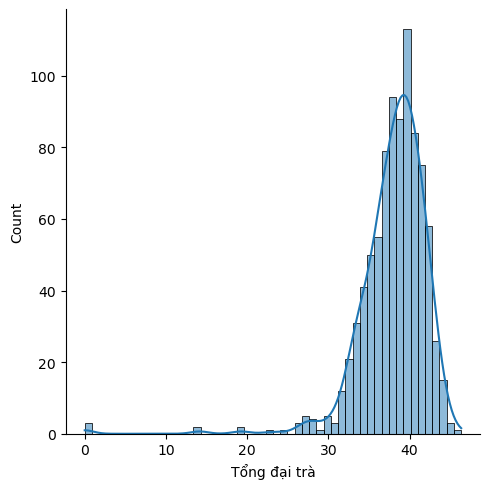

Số học sinh có điểm Tổng đại trà trên 40.0 có 278 người
Với chỉ tiêu 675 học sinh thì điểm chuẩn sẽ là 34.05


In [5]:
# Phân tích phổ điểm trường THPT Hàn THuyên

df = data[data['Trường'] == 'THPT HÀN THUYÊN']
sns.displot(x = df["Tổng đại trà"],kde = True)
plt.show()

print(f'Số học sinh có điểm Tổng đại trà trên 40.0 có {df[df["Tổng đại trà"] > 40]["Tổng đại trà"].count().sum()} người')

print(f'Với chỉ tiêu 675 học sinh thì điểm chuẩn sẽ là {df["Tổng đại trà"].iloc[675]}')

Có một học sinh được tổng 0 điểm có thể do bỏ thi hoặc vi  phạm quy chế thi

In [6]:
data["Mã tỉnh"] = data["Số báo danh"]
data

,Số báo danh,Họ và tên,Ngày sinh,Trường,Điểm Khuyến khích,Ngữ Văn,Tiếng Anh,Toán Tự Luận,Toán Trắc Nghiệm,Tổng toán,Môn Chuyên,Tổng Chuyên,Tổng đại trà,Mã tỉnh
1,020001,TRẦN HUỆ AN,02/01/2007,THPT HÀN THUYÊN,0.0,8.00,8.50,4.00,3.2,7.20,6.0,35.7,38.90,020001
2,020002,TRỊNH XUÂN AN,04/06/2007,THPT HÀN THUYÊN,0.0,8.00,8.50,4.50,3.8,8.30,0.0,0.0,39.10,020002
3,020003,CHU HUYỀN ANH,28/02/2007,THPT HÀN THUYÊN,0.0,7.00,8.50,5.00,4.0,9.00,0.0,0.0,41.50,020003
4,020004,HOÀNG TRUNG ANH,17/12/2007,THPT HÀN THUYÊN,0.0,4.75,9.50,4.50,3.2,7.70,0.0,0.0,34.40,020004
5,020005,NGUYỄN DOÃN VIỆT ANH,08/01/2007,THPT HÀN THUYÊN,0.0,7.00,7.25,4.75,3.6,8.35,0.0,0.0,37.95,020005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15408,230496,PHẠM THỊ HẢI YẾN,24/01/2007,THPT LƯƠNG TÀI 2,0.0,7.25,6.00,3.50,2.4,5.90,0.0,0.0,32.30,230496
15409,230497,NGUYỄN THỊ HOÀNG YẾN,16/06/2007,THPT LƯƠNG TÀI 2,0.0,6.00,4.00,4.00,2.0,6.00,0.0,0.0,25.05,230497
15410,230498,NGUYỄN THỊ HẢI YẾN,25/09/2007,THPT LƯƠNG TÀI 2,0.0,6.75,1.75,3.50,1.4,4.90,0.0,0.0,25.05,230498
15411,230499,NGUYỄN THỊ NHƯ Ý,13/08/2007,THPT LƯƠNG TÀI 2,0.0,8.00,7.00,3.50,2.8,6.30,0.0,0.0,35.60,230499
